## **Training Deep Neural Networks**

In [1]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/Handson_ML")

### Vanishing/Exploding Gradients Problem

A common problem is back propagation in DNN is vanishing/exploding gradients, we can get around this problem through
- setting initialization functions
- changing activation function
- using batch normalization / gradient clipping
- reusing pretrained layers 


In [3]:
from tensorflow import keras

In [4]:
## Xavier and He Initialization

### list of all initializers in keras
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [5]:
## he is commonly used with Relu
## method 1
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

## method 2
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

In [6]:
## Non Saturating Activation Functions

### list of activation functions in keras
[name for name in dir(keras.activations) if not name.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [7]:
### list of activation layers
[name for name in dir(keras.layers) if "relu" in name.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [8]:
## by using Leaky relu, if compensates the negative x-axis values that regular relu does not account for

### train using Fasion MNIST

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4423680/4422102 [==============================] - 0s 0us/step


In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [11]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.6351 - accuracy: 0.4310 - val_loss: 0.8833 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8442 - accuracy: 0.7182 - val_loss: 0.7114 - val_accuracy: 0.7630
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7029 - accuracy: 0.7668 - val_loss: 0.6335 - val_accuracy: 0.7880
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6359 - accuracy: 0.7874 - val_loss: 0.5832 - val_accuracy: 0.8084
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5895 - accuracy: 0.8042 - val_loss: 0.5516 - val_accuracy: 0.8186
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5528 - accuracy: 0.8139 - val_loss: 0.5279 - val_accuracy: 0.8268
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5352 - accuracy: 0.8187 - val_loss: 0.5100 - val_accuracy:

In [12]:
## try PReLU
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [14]:
history=model.fit(X_train, y_train, epochs=10,
                  validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.6939 - accuracy: 0.4779 - val_loss: 0.8939 - val_accuracy: 0.7230
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8494 - accuracy: 0.7259 - val_loss: 0.7142 - val_accuracy: 0.7696
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7047 - accuracy: 0.7670 - val_loss: 0.6356 - val_accuracy: 0.7916
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6386 - accuracy: 0.7891 - val_loss: 0.5879 - val_accuracy: 0.8032
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5942 - accuracy: 0.8023 - val_loss: 0.5582 - val_accuracy: 0.8126
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5625 - accuracy: 0.8115 - val_loss: 0.5375 - val_accuracy: 0.8170
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5442 - accuracy: 0.8174 - val_loss: 0.5143 - val_accuracy:

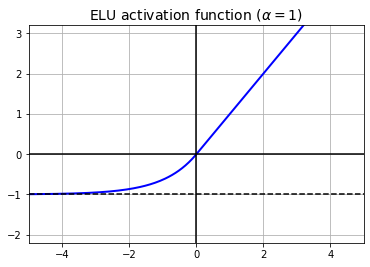

In [15]:
### ELU function
### for elu, avg output value is closer to 0, and for z<0 gradient isnt 0

import matplotlib.pyplot as plt
import numpy as np

def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

z = np.linspace(-5, 5, 200)
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

SELU is a derivation of ELU, stands for scaled elu


By default, the SELU hyperparameters (scale and alpha) are tuned in such a way that the mean output of each neuron remains close to 0, and the standard deviation remains close to 1 (assuming the inputs are standardized with mean 0 and standard deviation 1 too). Using this activation function, even a 1,000 layer deep neural network preserves roughly mean 0 and standard deviation 1 across all layers, avoiding the exploding/vanishing gradients problem:


In [16]:
### implementing selu
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

In [17]:
## lets try with 100 hidden layers
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
  model.add(keras.layers.Dense(100, activation="selu",
                               kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [19]:
## scale inputs

pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [20]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 30s 16ms/step - loss: 1.6509 - accuracy: 0.3811 - val_loss: 0.8543 - val_accuracy: 0.7060
Epoch 2/5
1719/1719 [==============================] - 27s 16ms/step - loss: 0.7850 - accuracy: 0.7196 - val_loss: 0.6670 - val_accuracy: 0.7642
Epoch 3/5
1719/1719 [==============================] - 27s 15ms/step - loss: 0.6506 - accuracy: 0.7711 - val_loss: 0.6080 - val_accuracy: 0.7910
Epoch 4/5
1719/1719 [==============================] - 27s 16ms/step - loss: 0.5873 - accuracy: 0.7958 - val_loss: 0.5596 - val_accuracy: 0.8120
Epoch 5/5
1719/1719 [==============================] - 27s 15ms/step - loss: 0.5271 - accuracy: 0.8192 - val_loss: 0.5068 - val_accuracy: 0.8262


In [21]:
### compare with relu

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [22]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 27s 15ms/step - loss: 2.1306 - accuracy: 0.1690 - val_loss: 1.5782 - val_accuracy: 0.2898
Epoch 2/5
1719/1719 [==============================] - 24s 14ms/step - loss: 1.4708 - accuracy: 0.3705 - val_loss: 1.3089 - val_accuracy: 0.4592
Epoch 3/5
1719/1719 [==============================] - 24s 14ms/step - loss: 1.1504 - accuracy: 0.5128 - val_loss: 1.1981 - val_accuracy: 0.5202
Epoch 4/5
1719/1719 [==============================] - 24s 14ms/step - loss: 0.9673 - accuracy: 0.5974 - val_loss: 0.8810 - val_accuracy: 0.6328
Epoch 5/5
1719/1719 [==============================] - 24s 14ms/step - loss: 0.8823 - accuracy: 0.6381 - val_loss: 0.7315 - val_accuracy: 0.7118


#### Batch Normalization

In [23]:
# batch normal calculates mean and std for each batch, 
# and separately train mean and std to use for test set

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")

])

In [24]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_211 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_212 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_213 (Dense)            (None, 10)               

In [25]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [26]:
bn1.updates

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer.py:1402: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


[]

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [28]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 1.1574 - accuracy: 0.6213 - val_loss: 0.5579 - val_accuracy: 0.8138
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5902 - accuracy: 0.7991 - val_loss: 0.4806 - val_accuracy: 0.8388
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5216 - accuracy: 0.8176 - val_loss: 0.4434 - val_accuracy: 0.8508
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4778 - accuracy: 0.8303 - val_loss: 0.4210 - val_accuracy: 0.8550
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4587 - accuracy: 0.8377 - val_loss: 0.4065 - val_accuracy: 0.8592
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4433 - accuracy: 0.8451 - val_loss: 0.3932 - val_accuracy: 0.8624
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4273 - accuracy: 0.8494 - val_loss: 0.3843 - val_accuracy:

In [29]:
### sometimes using BN before activation function works better, set use_bias=False for Dense layers
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [30]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [31]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 1.4741 - accuracy: 0.5239 - val_loss: 0.6712 - val_accuracy: 0.7970
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7057 - accuracy: 0.7796 - val_loss: 0.5506 - val_accuracy: 0.8224
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6097 - accuracy: 0.8004 - val_loss: 0.4969 - val_accuracy: 0.8378
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5496 - accuracy: 0.8163 - val_loss: 0.4629 - val_accuracy: 0.8444
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5178 - accuracy: 0.8246 - val_loss: 0.4404 - val_accuracy: 0.8550
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4950 - accuracy: 0.8322 - val_loss: 0.4236 - val_accuracy: 0.8594
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4813 - accuracy: 0.8332 - val_loss: 0.4112 - val_accuracy:

In [32]:
### Can also use Gradient Clipping
optimizer = keras.optimizers.SGD(clipvalue=1.0)
optimizer = keras.optimizers.SGD(clipnorm=1.0)

### Reusing Pretrained Layers


Let's split the fashion MNIST training set in two:

- X_train_A: all images of all items except for sandals and shirts (classes 5 and 6).
- X_train_B: a much smaller training set of just the first 200 images of sandals or shirts.

We will train set A, and use it to tackle set B. 
Yet, scine we are using Dense layers, only patterns that occur at the same location can be used(Convoluation layer works much better)

In [33]:
def split_dataset(X, y):
  y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
  y_A = y[~y_5_or_6] # bitwise not
  y_A[y_A > 6 ] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
  y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task

  return ((X[~y_5_or_6], y_A),
          (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [34]:
X_train_A.shape

(43986, 28, 28)

In [35]:
X_train_B.shape

(200, 28, 28)

In [36]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [37]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [38]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
  model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [39]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [40]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                      validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 5s 3ms/step - loss: 0.8055 - accuracy: 0.7285 - val_loss: 0.3894 - val_accuracy: 0.8635
Epoch 2/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3728 - accuracy: 0.8668 - val_loss: 0.3278 - val_accuracy: 0.8869
Epoch 3/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3244 - accuracy: 0.8861 - val_loss: 0.3044 - val_accuracy: 0.8954
Epoch 4/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3060 - accuracy: 0.8932 - val_loss: 0.2892 - val_accuracy: 0.8991
Epoch 5/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2865 - accuracy: 0.8999 - val_loss: 0.2868 - val_accuracy: 0.8984
Epoch 6/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2759 - accuracy: 0.9041 - val_loss: 0.2726 - val_accuracy: 0.9071
Epoch 7/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2665 - accuracy: 0.9092 - val_loss: 0.2694 - val_accuracy:

In [41]:
model_A.save("my_model_A.h5")

In [42]:
# train model_B separately to compare
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
  model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [43]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [44]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 42ms/step - loss: 0.4975 - accuracy: 0.8443 - val_loss: 0.4591 - val_accuracy: 0.8205
Epoch 2/20
7/7 [==============================] - 0s 15ms/step - loss: 0.3879 - accuracy: 0.8950 - val_loss: 0.3874 - val_accuracy: 0.8682
Epoch 3/20
7/7 [==============================] - 0s 18ms/step - loss: 0.3183 - accuracy: 0.9256 - val_loss: 0.3335 - val_accuracy: 0.9057
Epoch 4/20
7/7 [==============================] - 0s 15ms/step - loss: 0.2559 - accuracy: 0.9812 - val_loss: 0.2948 - val_accuracy: 0.9249
Epoch 5/20
7/7 [==============================] - 0s 16ms/step - loss: 0.2218 - accuracy: 0.9678 - val_loss: 0.2651 - val_accuracy: 0.9402
Epoch 6/20
7/7 [==============================] - 0s 16ms/step - loss: 0.1987 - accuracy: 0.9845 - val_loss: 0.2390 - val_accuracy: 0.9554
Epoch 7/20
7/7 [==============================] - 0s 16ms/step - loss: 0.1774 - accuracy: 0.9825 - val_loss: 0.2194 - val_accuracy: 0.9584
Epoch 8/20
7/7 [===========

In [45]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_214 (Dense)            (None, 300)               235200    
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)               1200      
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dense_215 (Dense)            (None, 100)               30000     
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)              

In [46]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [47]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [48]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

In [49]:
# not so great if layers cant train
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 41ms/step - loss: 0.2375 - accuracy: 0.9185 - val_loss: 0.2662 - val_accuracy: 0.9016
Epoch 2/4
7/7 [==============================] - 0s 15ms/step - loss: 0.2339 - accuracy: 0.9236 - val_loss: 0.2594 - val_accuracy: 0.9077
Epoch 3/4
7/7 [==============================] - 0s 15ms/step - loss: 0.2258 - accuracy: 0.9217 - val_loss: 0.2524 - val_accuracy: 0.9128
Epoch 4/4
7/7 [==============================] - 0s 16ms/step - loss: 0.2019 - accuracy: 0.9350 - val_loss: 0.2459 - val_accuracy: 0.9189


In [50]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/16
7/7 [==============================] - 1s 43ms/step - loss: 0.1898 - accuracy: 0.9536 - val_loss: 0.1989 - val_accuracy: 0.9473
Epoch 2/16
7/7 [==============================] - 0s 18ms/step - loss: 0.1643 - accuracy: 0.9766 - val_loss: 0.1707 - val_accuracy: 0.9635
Epoch 3/16
7/7 [==============================] - 0s 17ms/step - loss: 0.1163 - accuracy: 0.9927 - val_loss: 0.1495 - val_accuracy: 0.9726
Epoch 4/16
7/7 [==============================] - 0s 15ms/step - loss: 0.1125 - accuracy: 0.9882 - val_loss: 0.1340 - val_accuracy: 0.9777
Epoch 5/16
7/7 [==============================] - 0s 40ms/step - loss: 0.1046 - accuracy: 0.9806 - val_loss: 0.1202 - val_accuracy: 0.9817
Epoch 6/16
7/7 [==============================] - 0s 16ms/step - loss: 0.0871 - accuracy: 0.9904 - val_loss: 0.1102 - val_accuracy: 0.9828
Epoch 7/16
7/7 [==============================] - 0s 17ms/step - loss: 0.0798 - accuracy: 0.9862 - val_loss: 0.1019 - val_accuracy: 0.9858
Epoch 8/16
7/7 [===========

In [51]:
# evaluate
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.1178 - accuracy: 0.9725


[0.11778994649648666, 0.9725000262260437]

In [52]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9955


[0.057537563145160675, 0.9955000281333923]

### Faster Optimizers

In [53]:
## list of faster optimizers

# Momentum optimizer
keras.optimizers.SGD(lr=0.001, momentum=0.9)

# Nestrov Accelerated Gradient
keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

# AdaGrad
keras.optimizers.Adagrad(lr=0.001)

# RMSProp
keras.optimizers.RMSprop(lr=0.001, rho=0.9)

# Adam Optimizer
keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Adamax Optimizer
keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)

# Nadam Optimizer
keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

### Learning Rate Scheduling

In [54]:
# power scheduling
# lr = lr0 / (1 + steps / s)**c
# keras uses c=1 and s= 1/decay

optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

In [55]:
model = keras.models.Sequential([
      keras.layers.Flatten(input_shape=[28, 28]),
      keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
      keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
      keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [56]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6075 - accuracy: 0.7909 - val_loss: 0.4252 - val_accuracy: 0.8512
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3868 - accuracy: 0.8631 - val_loss: 0.3828 - val_accuracy: 0.8698
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3553 - accuracy: 0.8732 - val_loss: 0.3748 - val_accuracy: 0.8712
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3262 - accuracy: 0.8843 - val_loss: 0.3545 - val_accuracy: 0.8768
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3117 - accuracy: 0.8900 - val_loss: 0.3556 - val_accuracy: 0.8756
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2950 - accuracy: 0.8951 - val_loss: 0.3457 - val_accuracy: 0.8804
Epoch 7/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2881 - accuracy: 0.8967 - val_loss: 0.3397 - val_accuracy:

In [57]:
# Exponential Schuduling
# lr = lr0 * 0.1**(epoch / s)

def exponential_decay(lr0, s):
  def exponential_decay_fn(epoch):
      return lr0 * 0.1**(epoch/s)
  return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [58]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [59]:
n_epochs = 25

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 11s 6ms/step - loss: 1.0988 - accuracy: 0.7309 - val_loss: 0.7871 - val_accuracy: 0.7448
Epoch 2/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6624 - accuracy: 0.7976 - val_loss: 0.6139 - val_accuracy: 0.8218
Epoch 3/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6054 - accuracy: 0.8140 - val_loss: 0.7715 - val_accuracy: 0.7642
Epoch 4/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5991 - accuracy: 0.8191 - val_loss: 0.6373 - val_accuracy: 0.7656
Epoch 5/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4820 - accuracy: 0.8496 - val_loss: 0.8638 - val_accuracy: 0.7400
Epoch 6/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4486 - accuracy: 0.8592 - val_loss: 0.6068 - val_accuracy: 0.8326
Epoch 7/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4193 - accuracy: 0.8665 - val_loss: 0.5663 - val_ac

In [60]:
# can also change learning rate at each iteration
# then must write own callback class

K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
  def __init__(self, s=40000):
    super().__init__()
    self.s = s

  def on_batch_begin(self, batch, logs=None):
    # 'batch' argument is resetted at each epoch
    lr = K.get_value(self.model.optimizer.lr)
    K.set_value(self.model.optimizer.lr, lr * 0.1**(1 / s))

  def on_epoch_end(self, epoch, logs=None):
    log = logs or {}
    logs['lr'] = K.get_value(self.model.optimizer.lr)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(lr=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # number of iterations
exp_decay = ExponentialDecay(s)

history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 11s 6ms/step - loss: 1.0841 - accuracy: 0.7360 - val_loss: 0.6114 - val_accuracy: 0.7996
Epoch 2/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6320 - accuracy: 0.8022 - val_loss: 0.8244 - val_accuracy: 0.7808
Epoch 3/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5871 - accuracy: 0.8196 - val_loss: 1.1026 - val_accuracy: 0.8174
Epoch 4/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5326 - accuracy: 0.8374 - val_loss: 0.5491 - val_accuracy: 0.8196
Epoch 5/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4593 - accuracy: 0.8513 - val_loss: 0.5585 - val_accuracy: 0.8474
Epoch 6/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4327 - accuracy: 0.8615 - val_loss: 0.5117 - val_accuracy: 0.8652
Epoch 7/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3913 - accuracy: 0.8728 - val_loss: 0.4882 - val_ac

In [61]:
## Piecewise Constant Scheduling

def piecewise_constant(boundaries, values):
  boundaries = np.array([0] + boundaries)
  values = np.array(values)
  def piecewise_constant_fn(epoch):
    return values[np.argmax(boundaries > epoch) - 1]
  return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [62]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 11s 6ms/step - loss: 1.1094 - accuracy: 0.7307 - val_loss: 0.7307 - val_accuracy: 0.7526
Epoch 2/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.8288 - accuracy: 0.7581 - val_loss: 0.9563 - val_accuracy: 0.7204
Epoch 3/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.9229 - accuracy: 0.7273 - val_loss: 1.0503 - val_accuracy: 0.6278
Epoch 4/25
1719/1719 [==============================] - 10s 6ms/step - loss: 1.1063 - accuracy: 0.6430 - val_loss: 1.0282 - val_accuracy: 0.6912
Epoch 5/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.9112 - accuracy: 0.6981 - val_loss: 0.8467 - val_accuracy: 0.7416
Epoch 6/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6322 - accuracy: 0.7894 - val_loss: 0.7272 - val_accuracy: 0.8186
Epoch 7/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6113 - accuracy: 0.7942 - val_loss: 0.7609 - val_ac

In [63]:
# can also use performance scheduling

lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7555 - accuracy: 0.7653 - val_loss: 0.6150 - val_accuracy: 0.8016
Epoch 2/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5045 - accuracy: 0.8363 - val_loss: 0.6704 - val_accuracy: 0.7882
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4847 - accuracy: 0.8476 - val_loss: 0.7740 - val_accuracy: 0.8102
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4958 - accuracy: 0.8486 - val_loss: 0.6269 - val_accuracy: 0.8480
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5405 - accuracy: 0.8471 - val_loss: 0.5776 - val_accuracy: 0.8598
Epoch 6/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5087 - accuracy: 0.8550 - val_loss: 0.9942 - val_accuracy: 0.8056
Epoch 7/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5355 - accuracy: 0.8510 - val_loss: 0.5602 - val_accuracy:

In [64]:
## 1 Cycle scheduling

class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [65]:
n_epochs = 25
batch_size = 128
onecycle = OneCycleScheduler(len(X_train) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
430/430 [==============================] - 3s 7ms/step - loss: 0.0678 - accuracy: 0.9741 - val_loss: 0.5312 - val_accuracy: 0.8942
Epoch 2/25
430/430 [==============================] - 3s 7ms/step - loss: 0.0696 - accuracy: 0.9729 - val_loss: 0.5541 - val_accuracy: 0.8902
Epoch 3/25
430/430 [==============================] - 3s 7ms/step - loss: 0.0733 - accuracy: 0.9712 - val_loss: 0.5723 - val_accuracy: 0.8952
Epoch 4/25
430/430 [==============================] - 3s 7ms/step - loss: 0.0767 - accuracy: 0.9703 - val_loss: 0.5776 - val_accuracy: 0.8894
Epoch 5/25
430/430 [==============================] - 3s 7ms/step - loss: 0.0809 - accuracy: 0.9683 - val_loss: 0.5799 - val_accuracy: 0.8892
Epoch 6/25
430/430 [==============================] - 3s 7ms/step - loss: 0.0875 - accuracy: 0.9662 - val_loss: 0.6435 - val_accuracy: 0.8838
Epoch 7/25
430/430 [==============================] - 3s 7ms/step - loss: 0.1039 - accuracy: 0.9602 - val_loss: 0.5755 - val_accuracy: 0.8900
Epoch 

### Avoiding Overfitting with Regularization

In [66]:
#### l1 ans l2 regularization

layer = keras.layers.Dense(100, activation="elu", 
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# can also use l1(0.1) for l1 regularization
# or l1_l2(0.1, 0.01) for both l1 and l2 regularization

In [67]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))                
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 12s 7ms/step - loss: 3.2306 - accuracy: 0.7928 - val_loss: 0.7027 - val_accuracy: 0.8386
Epoch 2/2
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7246 - accuracy: 0.8269 - val_loss: 0.6993 - val_accuracy: 0.8348


### Dropout

In [68]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),

])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
histroy = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 11s 6ms/step - loss: 3.6640 - accuracy: 0.3849 - val_loss: 2.4847 - val_accuracy: 0.4726
Epoch 2/2
1719/1719 [==============================] - 10s 6ms/step - loss: 2.5860 - accuracy: 0.4589 - val_loss: 2.0906 - val_accuracy: 0.5028


In [72]:
### alpha dropout should be used for the network using SELU activation
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7890 - accuracy: 0.7214 - val_loss: 0.6212 - val_accuracy: 0.8340
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5669 - accuracy: 0.7912 - val_loss: 0.5137 - val_accuracy: 0.8488
Epoch 3/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5359 - accuracy: 0.8009 - val_loss: 0.4767 - val_accuracy: 0.8598
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5061 - accuracy: 0.8136 - val_loss: 0.5126 - val_accuracy: 0.8534
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4967 - accuracy: 0.8150 - val_loss: 0.4506 - val_accuracy: 0.8616
Epoch 6/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4767 - accuracy: 0.8240 - val_loss: 0.4573 - val_accuracy: 0.8650
Epoch 7/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4720 - accuracy: 0.8241 - val_loss: 0.4334 - val_accuracy:

In [73]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4734 - accuracy: 0.8636


[0.4734344780445099, 0.8636000156402588]

In [74]:
model.evaluate(X_train_scaled, y_train)

1719/1719 [==============================] - 3s 2ms/step - loss: 0.3586 - accuracy: 0.8821


[0.35864895582199097, 0.8821272850036621]

In [75]:
history = model.fit(X_train_scaled, y_train)

1719/1719 [==============================] - 7s 4ms/step - loss: 0.4181 - accuracy: 0.8453


#### MC Dropout

In [76]:
y_probas = np.stack([model(X_test_scaled, training=True) for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [77]:
np.round(model.predict(X_test_scaled[:1]), 2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [78]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.66, 0.  , 0.07, 0.  , 0.26]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.49, 0.  , 0.26]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.12, 0.  , 0.87]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.1 , 0.  , 0.87]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.01, 0.  , 0.93]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.32, 0.  , 0.09, 0.  , 0.59]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.  , 0.12, 0.  , 0.71]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.02, 0.  , 0.92]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.  , 0.34, 0.  , 0.47]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.04, 0.  , 0.83]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.01, 0.  , 0.9 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.26, 0.  , 0.14, 0.  , 0.59]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.53, 0.  , 0.27, 0.  , 0

In [79]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.22, 0.  , 0.11, 0.  , 0.66]],
      dtype=float32)

In [80]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.01, 0.01, 0.03, 0.26, 0.  , 0.14, 0.03, 0.29]],
      dtype=float32)

In [81]:
y_pred = np.argmax(y_proba, axis=1)

In [82]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8542

In [83]:
class MCDropout(keras.layers.Dropout):
  def call(self, inputs):
    return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
  def call(self, inputs):
    return super().call(inputs, training=True)

In [84]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [85]:
mc_model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
mc_alpha_dropout (MCAlphaDro (None, 784)               0         
_________________________________________________________________
dense_250 (Dense)            (None, 300)               235500    
_________________________________________________________________
mc_alpha_dropout_1 (MCAlphaD (None, 300)               0         
_________________________________________________________________
dense_251 (Dense)            (None, 100)               30100     
_________________________________________________________________
mc_alpha_dropout_2 (MCAlphaD (None, 100)               0         
_________________________________________________________________
dense_252 (Dense)            (None, 10)              

In [86]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [87]:
mc_model.set_weights(model.get_weights())

In [88]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.  , 0.14, 0.  , 0.66]],
      dtype=float32)

### Max norm

In [92]:
from functools import partial

## max norm regulates weights to be in certain range
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

MaxNormDense = partial(keras.layers.Dense, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5831 - accuracy: 0.8009 - val_loss: 0.3933 - val_accuracy: 0.8584
Epoch 2/2
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3597 - accuracy: 0.8672 - val_loss: 0.3488 - val_accuracy: 0.8778


### Deep Learning on CIFAR10

In [94]:
# build DNN with 20 hidden layers of 100 neurons, using ELU and He initialization
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
  model.add(keras.layers.Dense(100,
                               activation="elu",
                               kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(lr=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [95]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

170500096/170498071 [==============================] - 11s 0us/step


In [96]:
# create call backs
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
run_index = 1
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [97]:
model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 21s 13ms/step - loss: 11.7228 - accuracy: 0.1504 - val_loss: 2.7336 - val_accuracy: 0.1526
Epoch 2/100
1407/1407 [==============================] - 17s 12ms/step - loss: 2.1303 - accuracy: 0.2360 - val_loss: 2.0570 - val_accuracy: 0.2434
Epoch 3/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.9739 - accuracy: 0.2785 - val_loss: 2.0309 - val_accuracy: 0.2760
Epoch 4/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.8818 - accuracy: 0.3127 - val_loss: 1.9786 - val_accuracy: 0.2950
Epoch 5/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.8196 - accuracy: 0.3407 - val_loss: 1.8147 - val_accuracy: 0.3364
Epoch 6/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.7709 - accuracy: 0.3591 - val_loss: 1.7468 - val_accuracy: 0.3708
Epoch 7/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.7181 - accuracy: 0.3832 - val_loss: 

In [98]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 3ms/step - loss: 1.5203 - accuracy: 0.4722


[1.520346999168396, 0.4722000062465668]

In [100]:
# with batch norm
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(lr=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_bn_model.h5", save_best_only=True)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_bn_model.h5")
model.evaluate(X_valid, y_valid)


Epoch 1/100
1407/1407 [==============================] - 37s 19ms/step - loss: 1.9861 - accuracy: 0.2936 - val_loss: 1.6228 - val_accuracy: 0.4128
Epoch 2/100
1407/1407 [==============================] - 26s 18ms/step - loss: 1.6728 - accuracy: 0.4052 - val_loss: 1.5608 - val_accuracy: 0.4412
Epoch 3/100
1407/1407 [==============================] - 26s 19ms/step - loss: 1.5949 - accuracy: 0.4321 - val_loss: 1.5298 - val_accuracy: 0.4642
Epoch 4/100
1407/1407 [==============================] - 26s 19ms/step - loss: 1.5434 - accuracy: 0.4562 - val_loss: 1.4640 - val_accuracy: 0.4728
Epoch 5/100
1407/1407 [==============================] - 26s 18ms/step - loss: 1.5007 - accuracy: 0.4688 - val_loss: 1.4660 - val_accuracy: 0.4800
Epoch 6/100
1407/1407 [==============================] - 26s 19ms/step - loss: 1.4633 - accuracy: 0.4815 - val_loss: 1.4546 - val_accuracy: 0.4740
Epoch 7/100
1407/1407 [==============================] - 26s 18ms/step - loss: 1.4371 - accuracy: 0.4895 - val_loss: 1

[1.3249719142913818, 0.5361999869346619]

In [101]:
## Use "selu"

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(lr=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_selu_model.h5", save_best_only=True)
callbacks = [early_stopping_cb, model_checkpoint_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scaled, y_valid)


Epoch 1/100
1407/1407 [==============================] - 29s 18ms/step - loss: 2.0570 - accuracy: 0.2700 - val_loss: 1.9177 - val_accuracy: 0.3334
Epoch 2/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.7350 - accuracy: 0.3859 - val_loss: 1.6797 - val_accuracy: 0.3958
Epoch 3/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.6278 - accuracy: 0.4228 - val_loss: 1.7683 - val_accuracy: 0.3612
Epoch 4/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.5482 - accuracy: 0.4537 - val_loss: 1.5650 - val_accuracy: 0.4500
Epoch 5/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.4855 - accuracy: 0.4752 - val_loss: 1.5275 - val_accuracy: 0.4678
Epoch 6/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.4407 - accuracy: 0.4936 - val_loss: 1.5823 - val_accuracy: 0.4588
Epoch 7/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.3941 - accuracy: 0.5132 - val_loss: 1

[1.470486044883728, 0.4885999858379364]